In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib
import scipy
import sklearn
try:
    df = pd.read_csv('cirrhosis.csv')
    print(" Dataset loaded successfully!\n")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'cirrhosis.csv' not found. Please check the file path or upload the file.")
except Exception as e:
    print(" Error while loading dataset:", e)


In [ ]:
import pandas as pd

df = pd.read_csv('cirrhosis.csv')
print(" Dataset loaded successfully!\n")
print(df.head())


 Dataset loaded successfully!

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.shape

(418, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [ ]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

Checking for percentage of null data in each column

In [ ]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

Checking for duplicate data

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


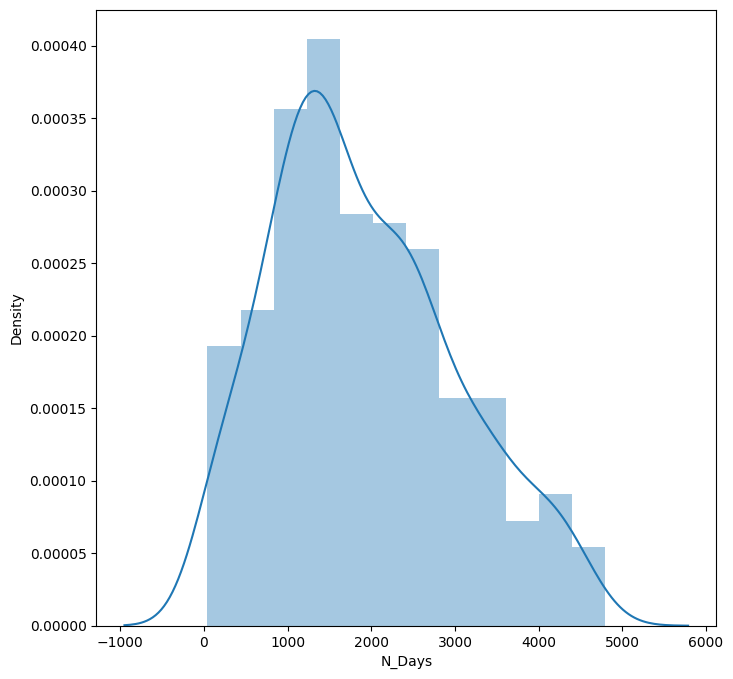

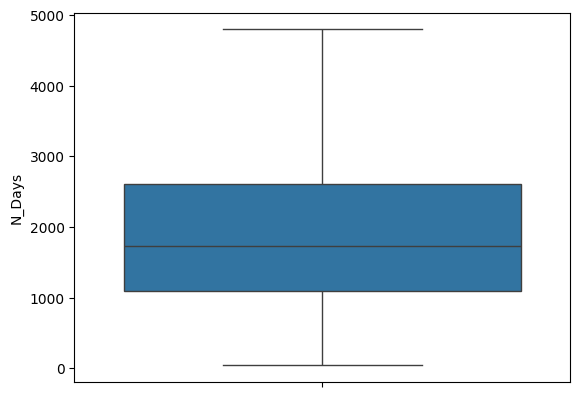

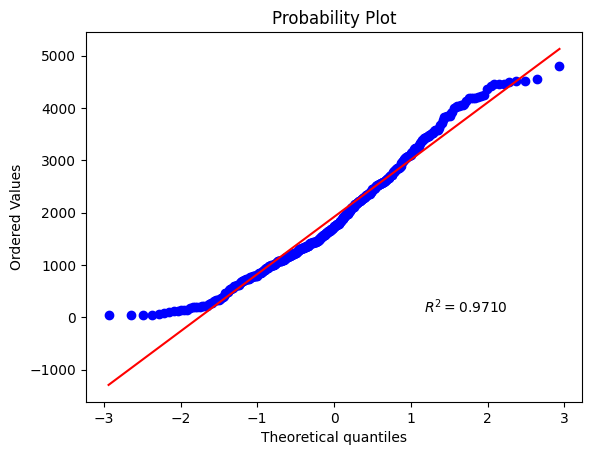

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


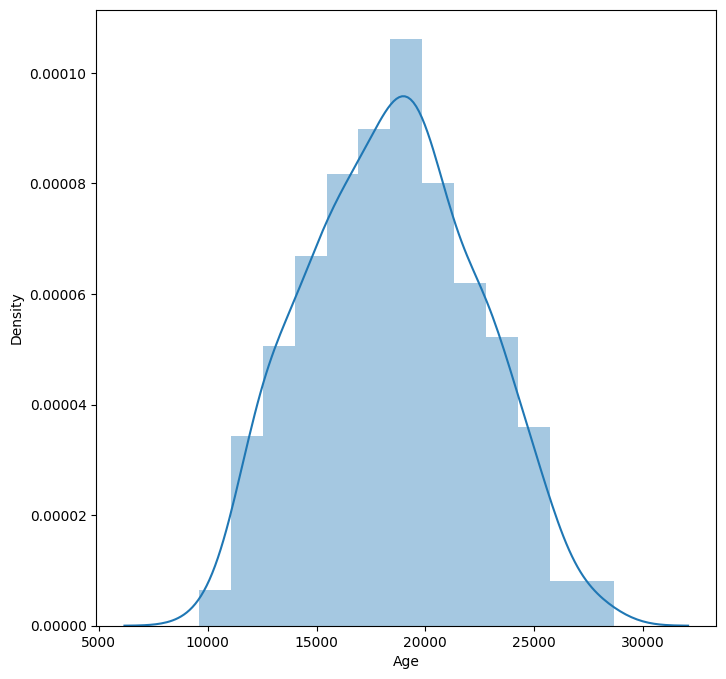

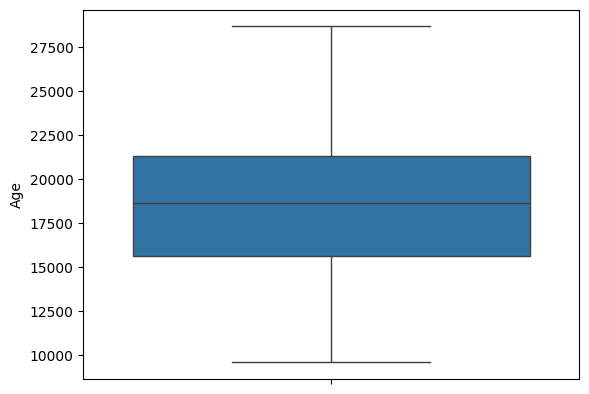

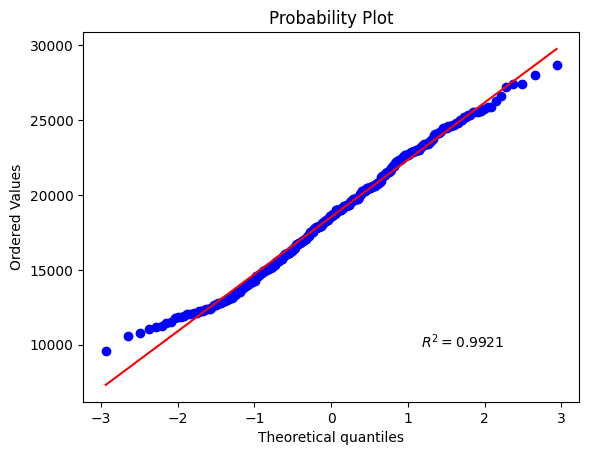

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


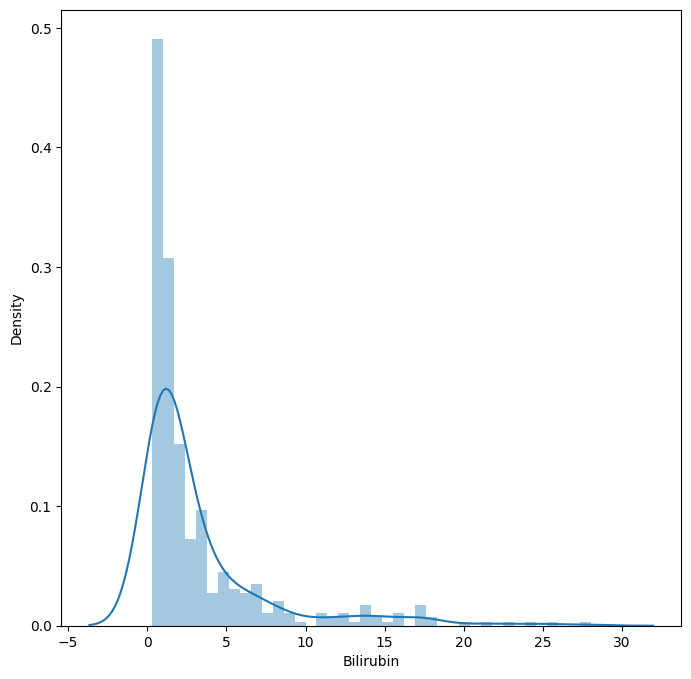

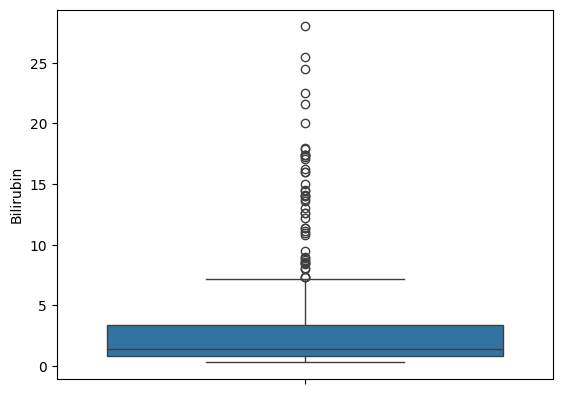

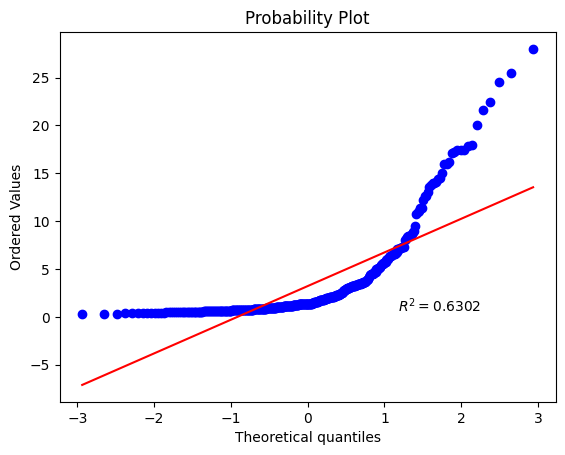

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


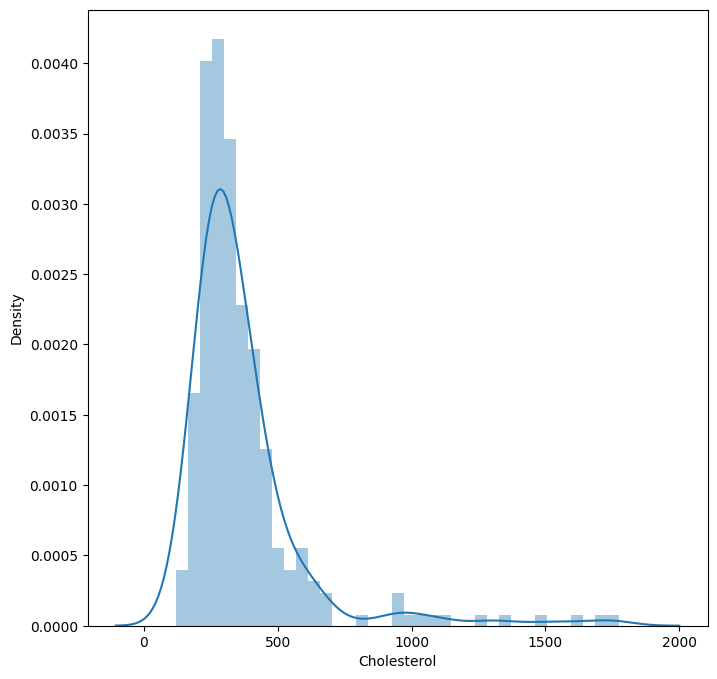

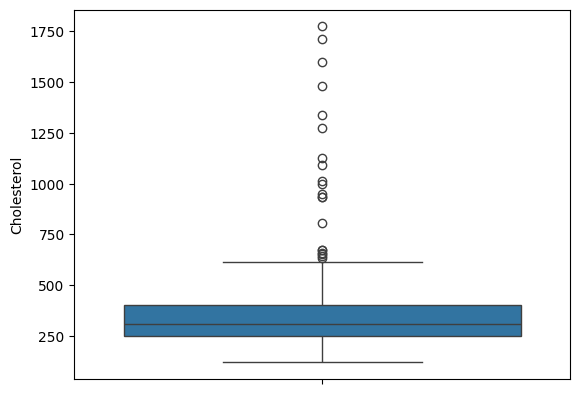

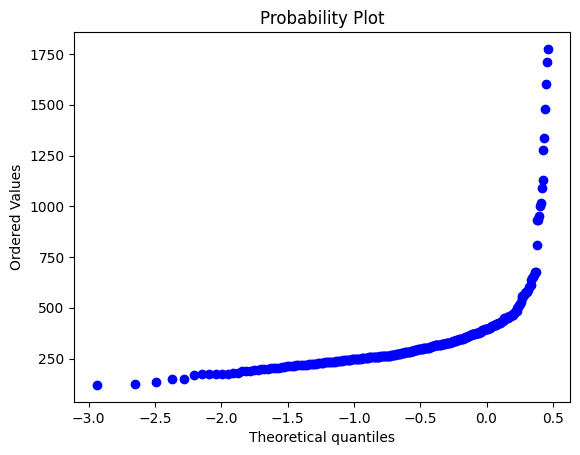

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


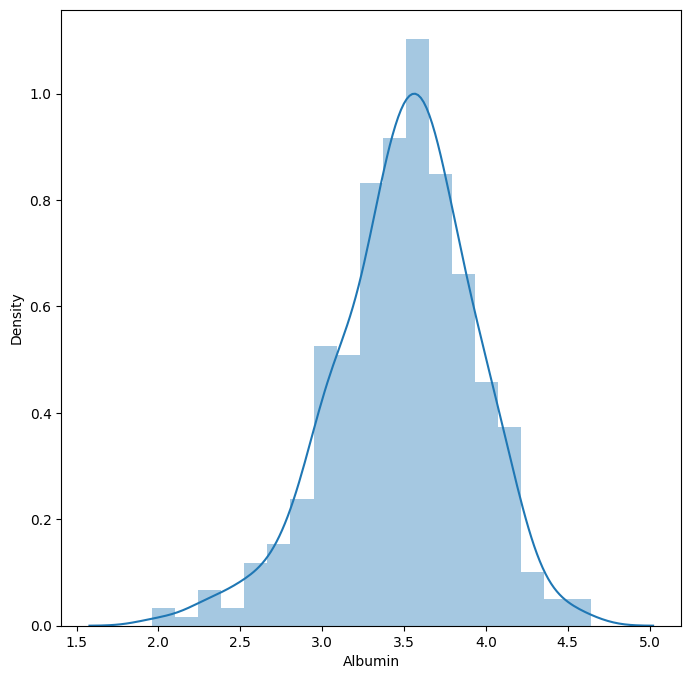

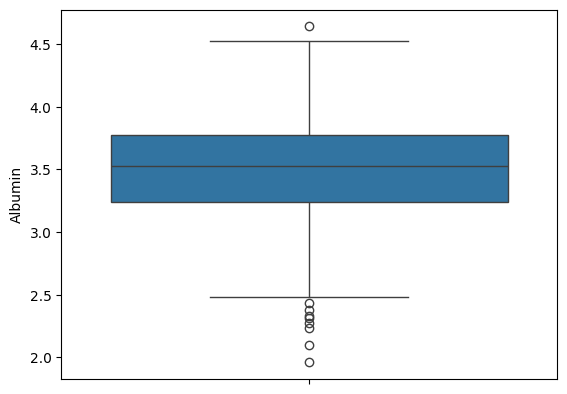

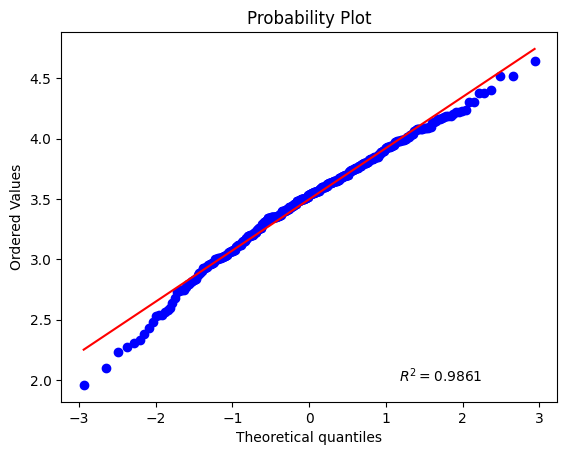

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


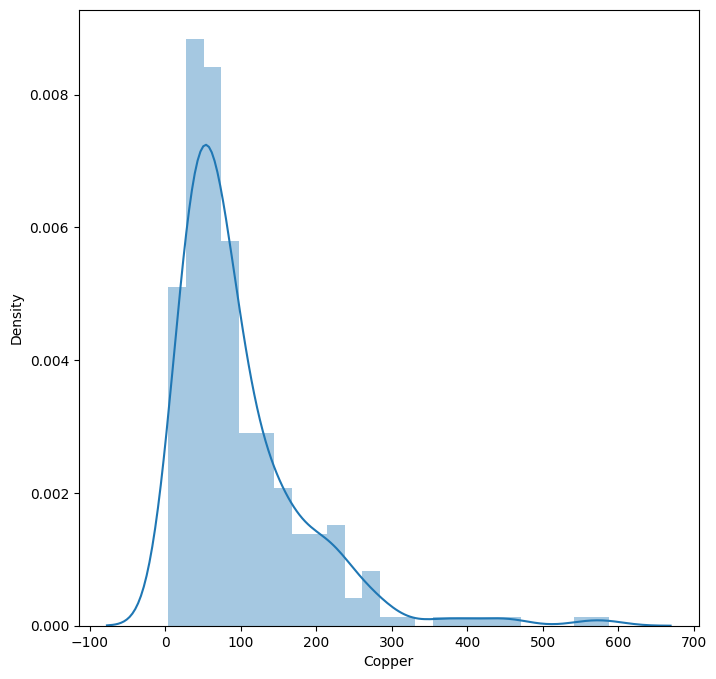

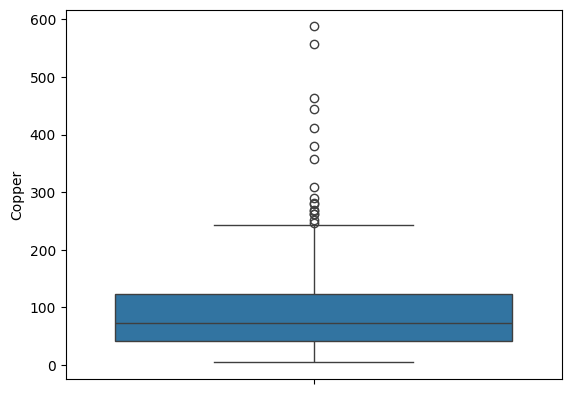

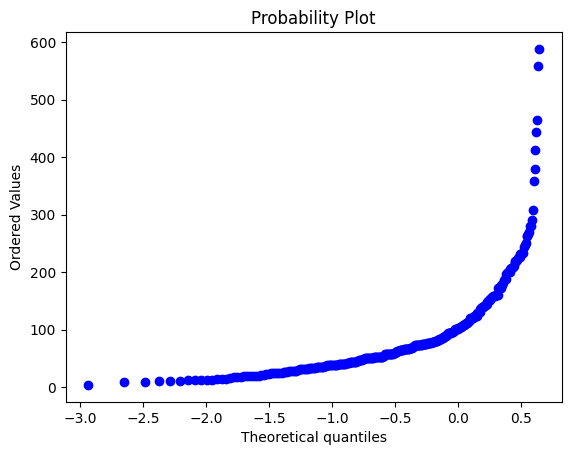

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


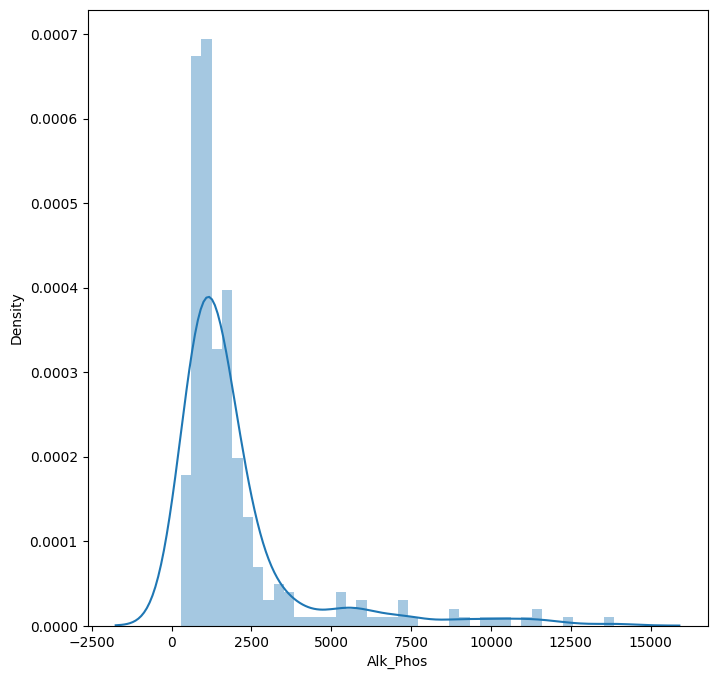

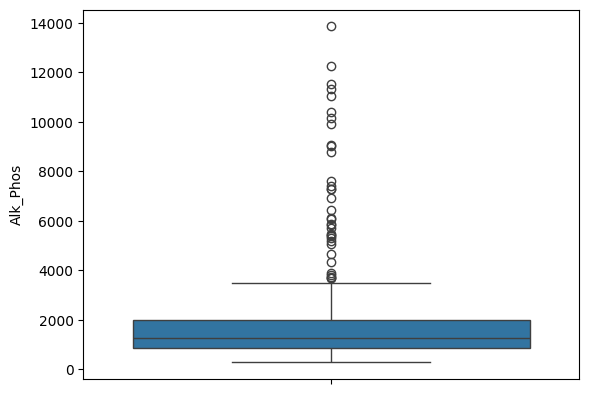

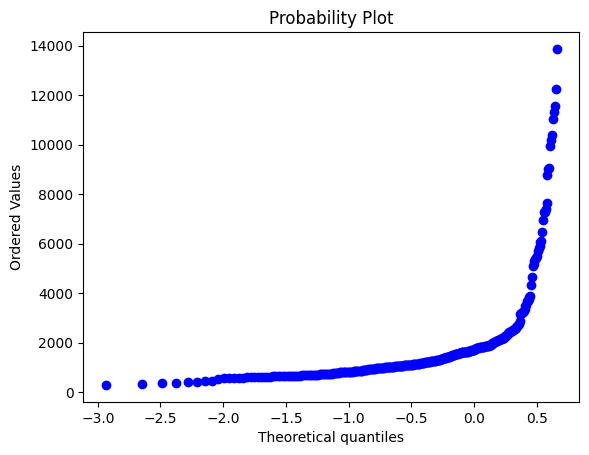

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


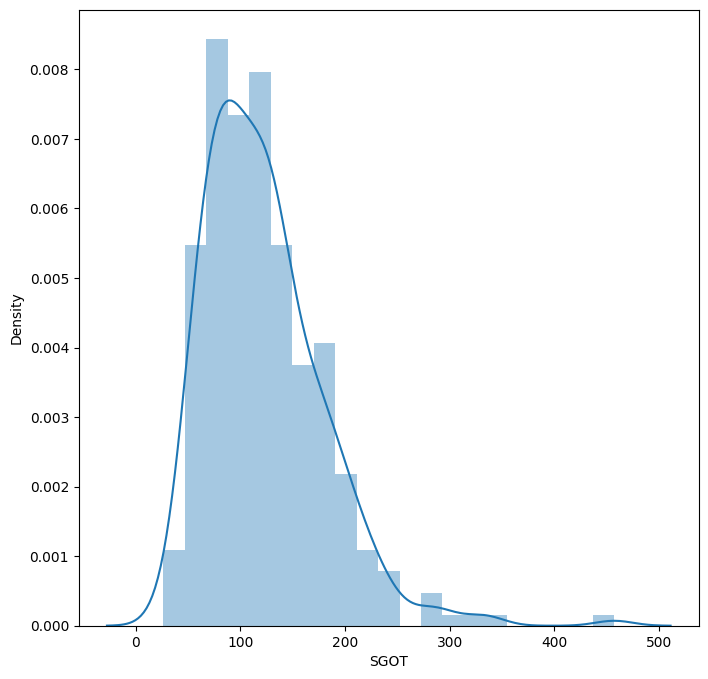

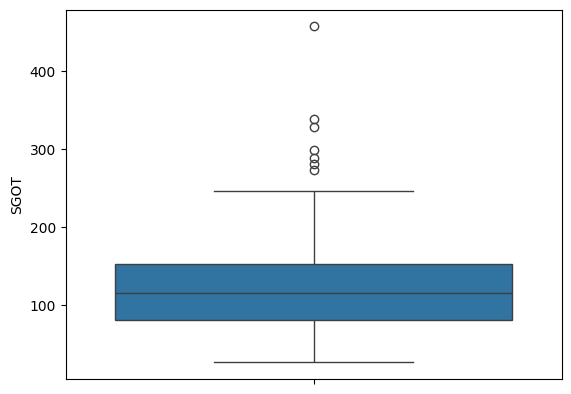

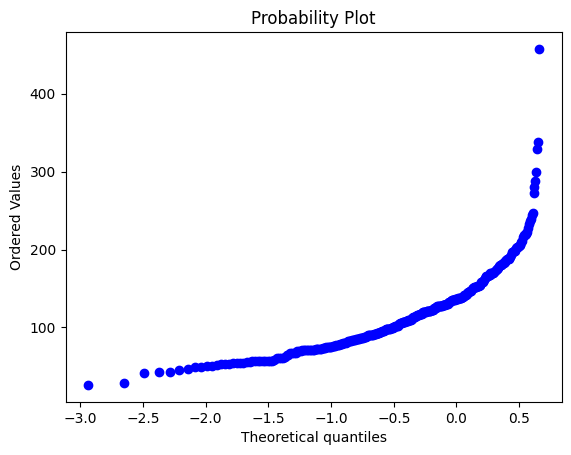

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


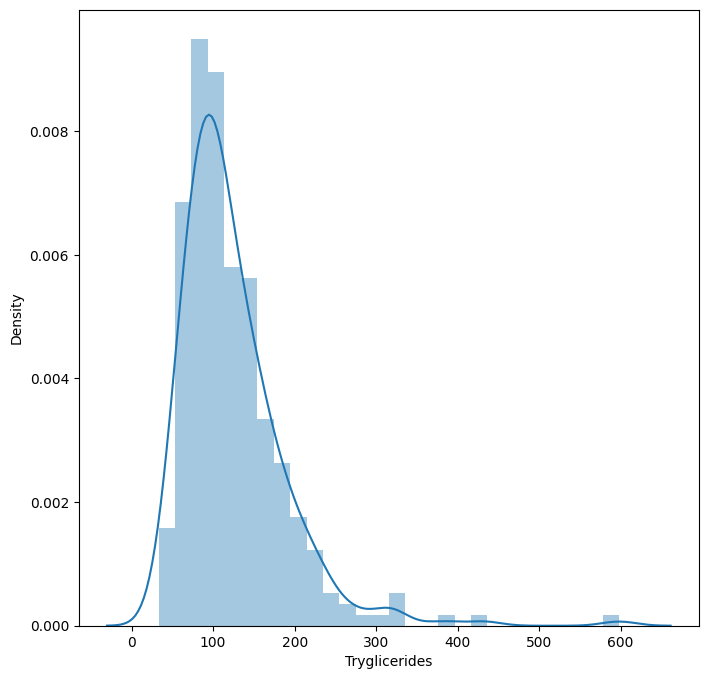

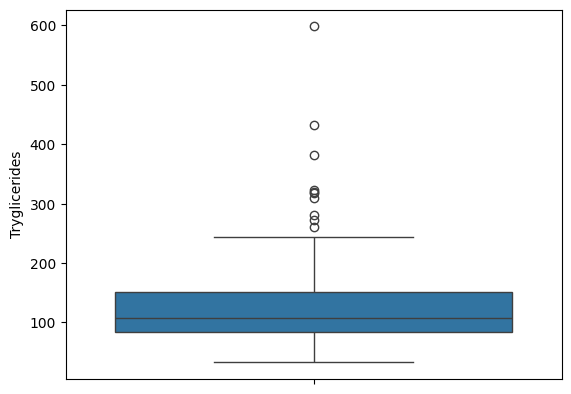

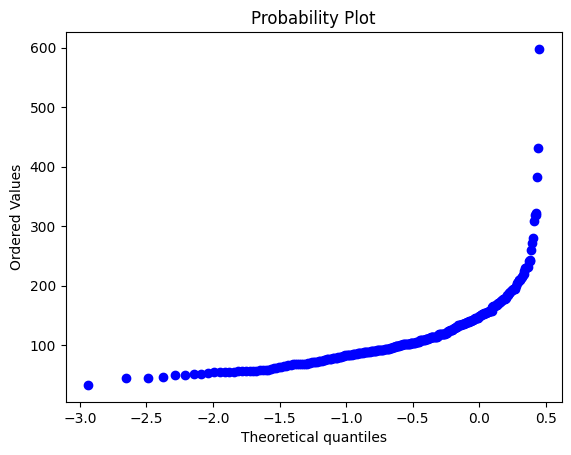

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


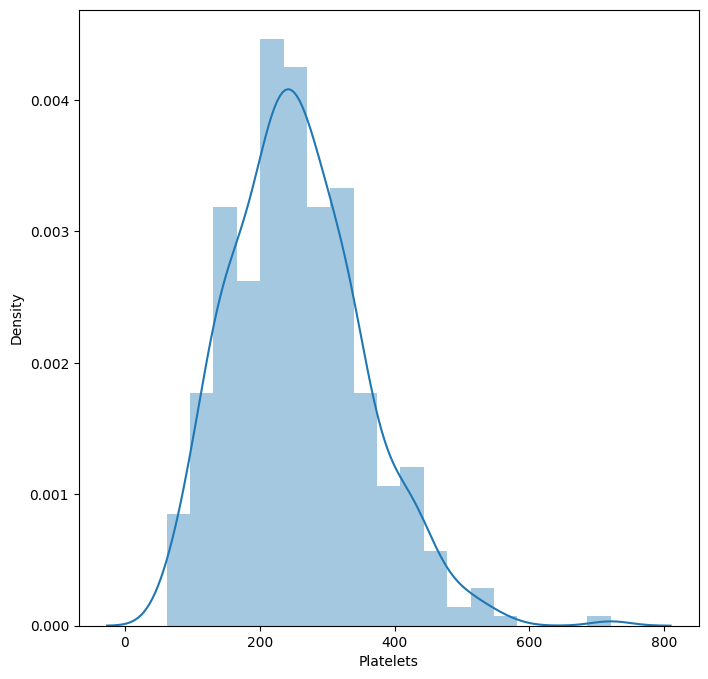

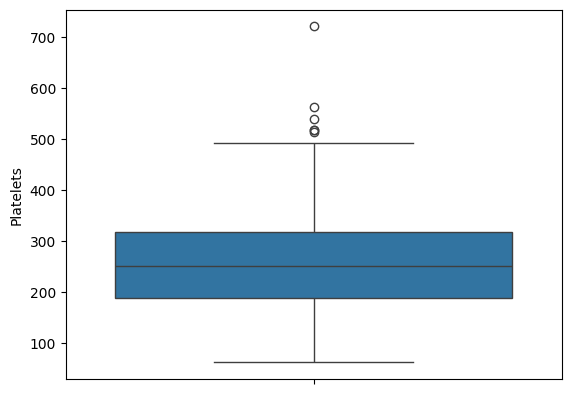

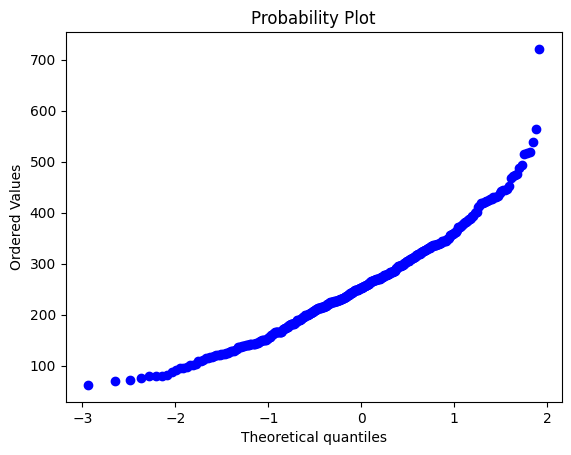

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


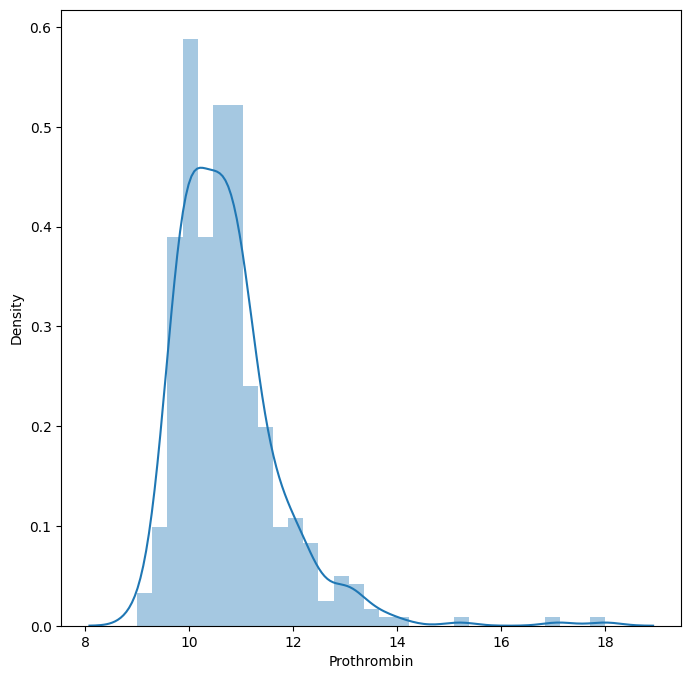

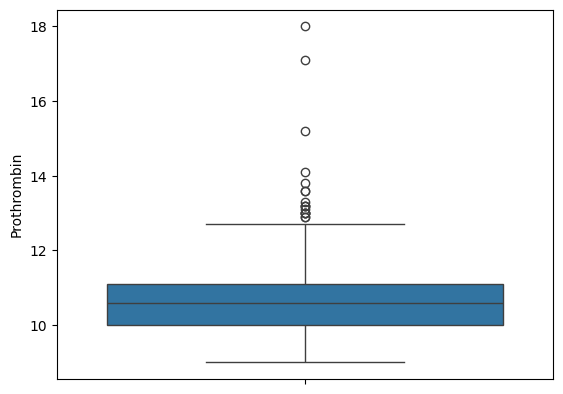

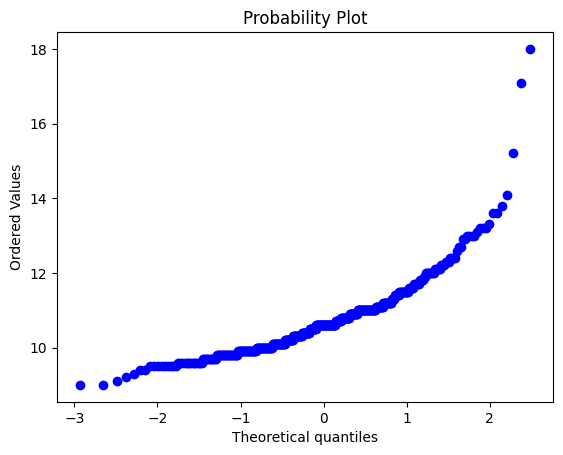

----------------------------


In [ ]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots

In [ ]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

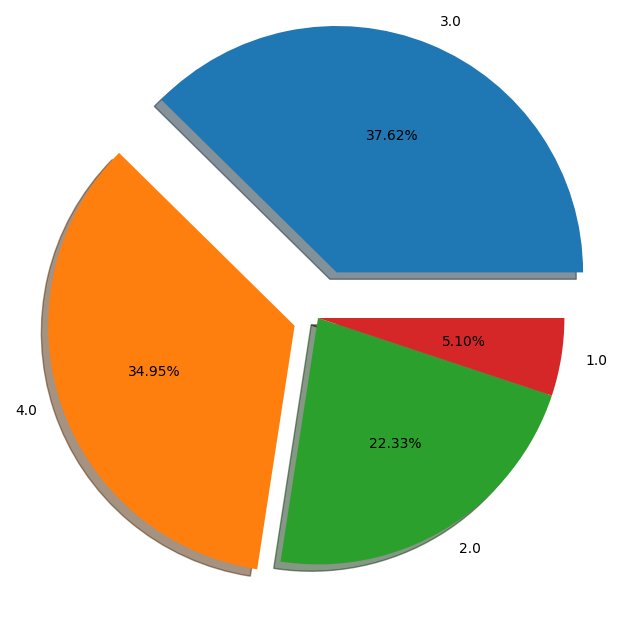

In [ ]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

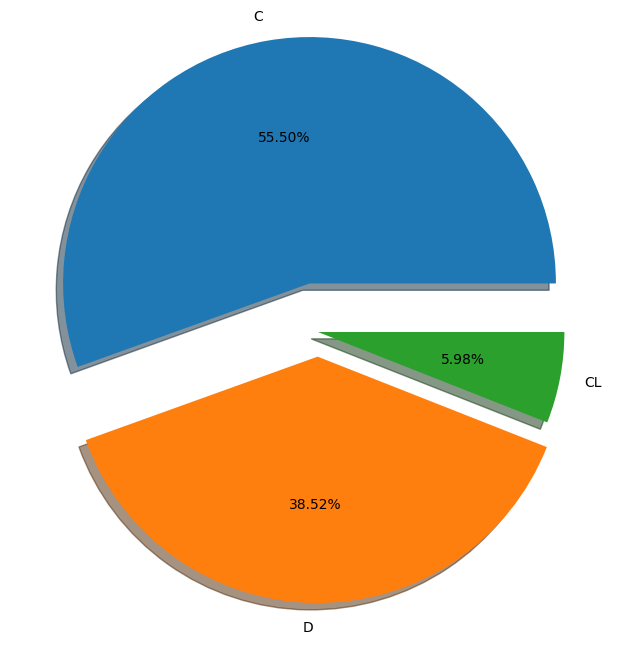

In [ ]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

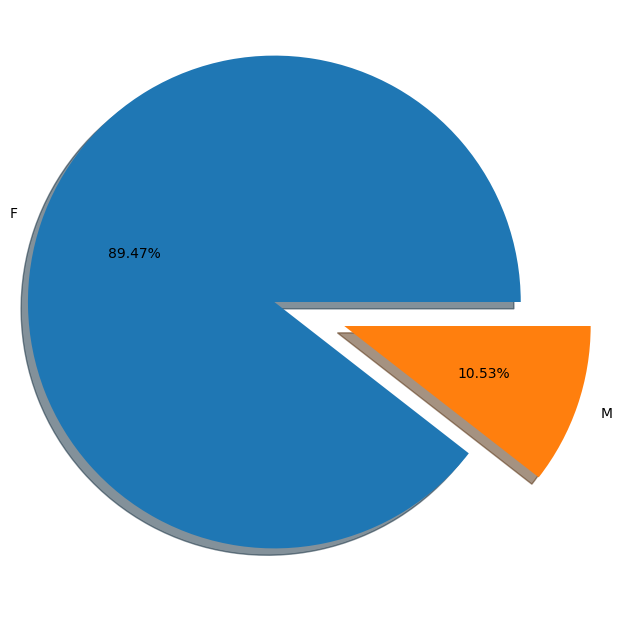

In [ ]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

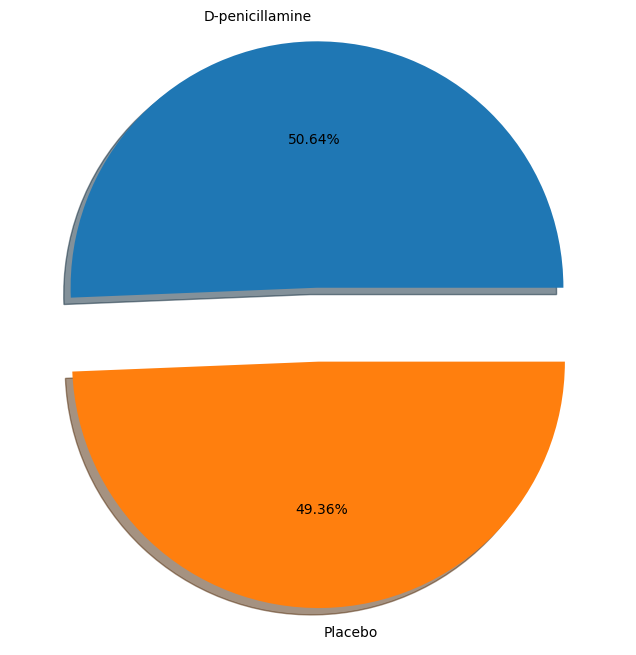

In [ ]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

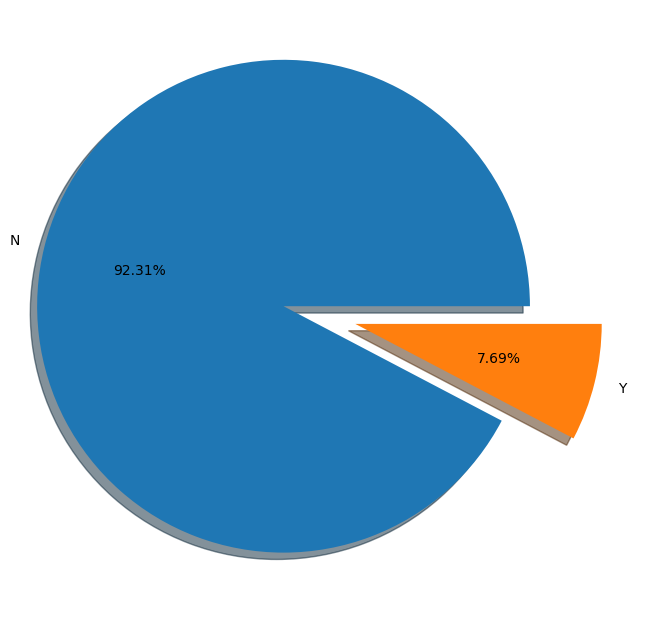

In [ ]:
pie_chart(df,'Ascites')

Only a tiny fraction of the population of patients had Ascites disease

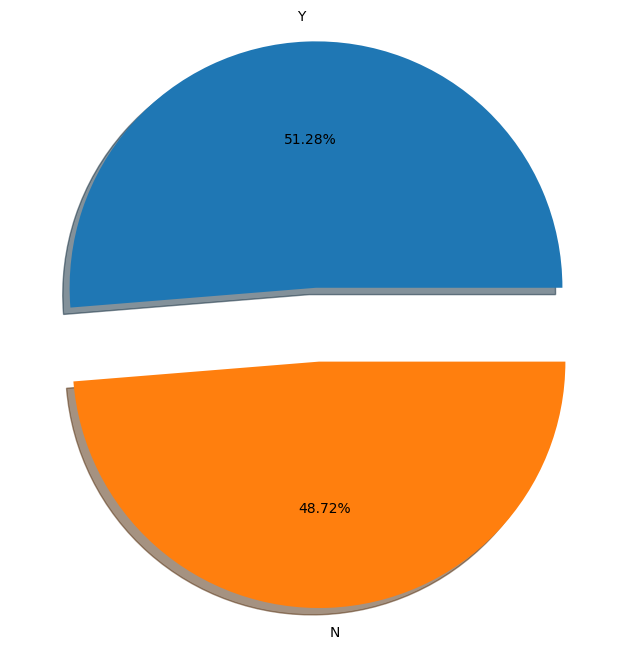

In [ ]:
pie_chart(df,'Hepatomegaly')

The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

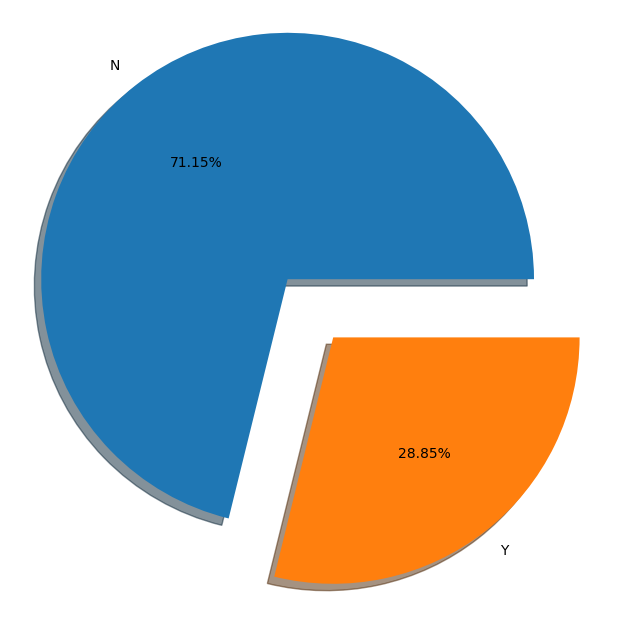

In [ ]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

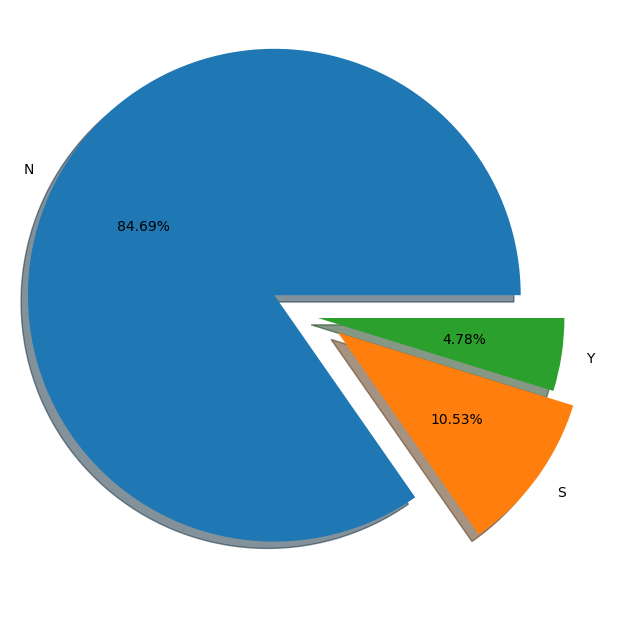

In [ ]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

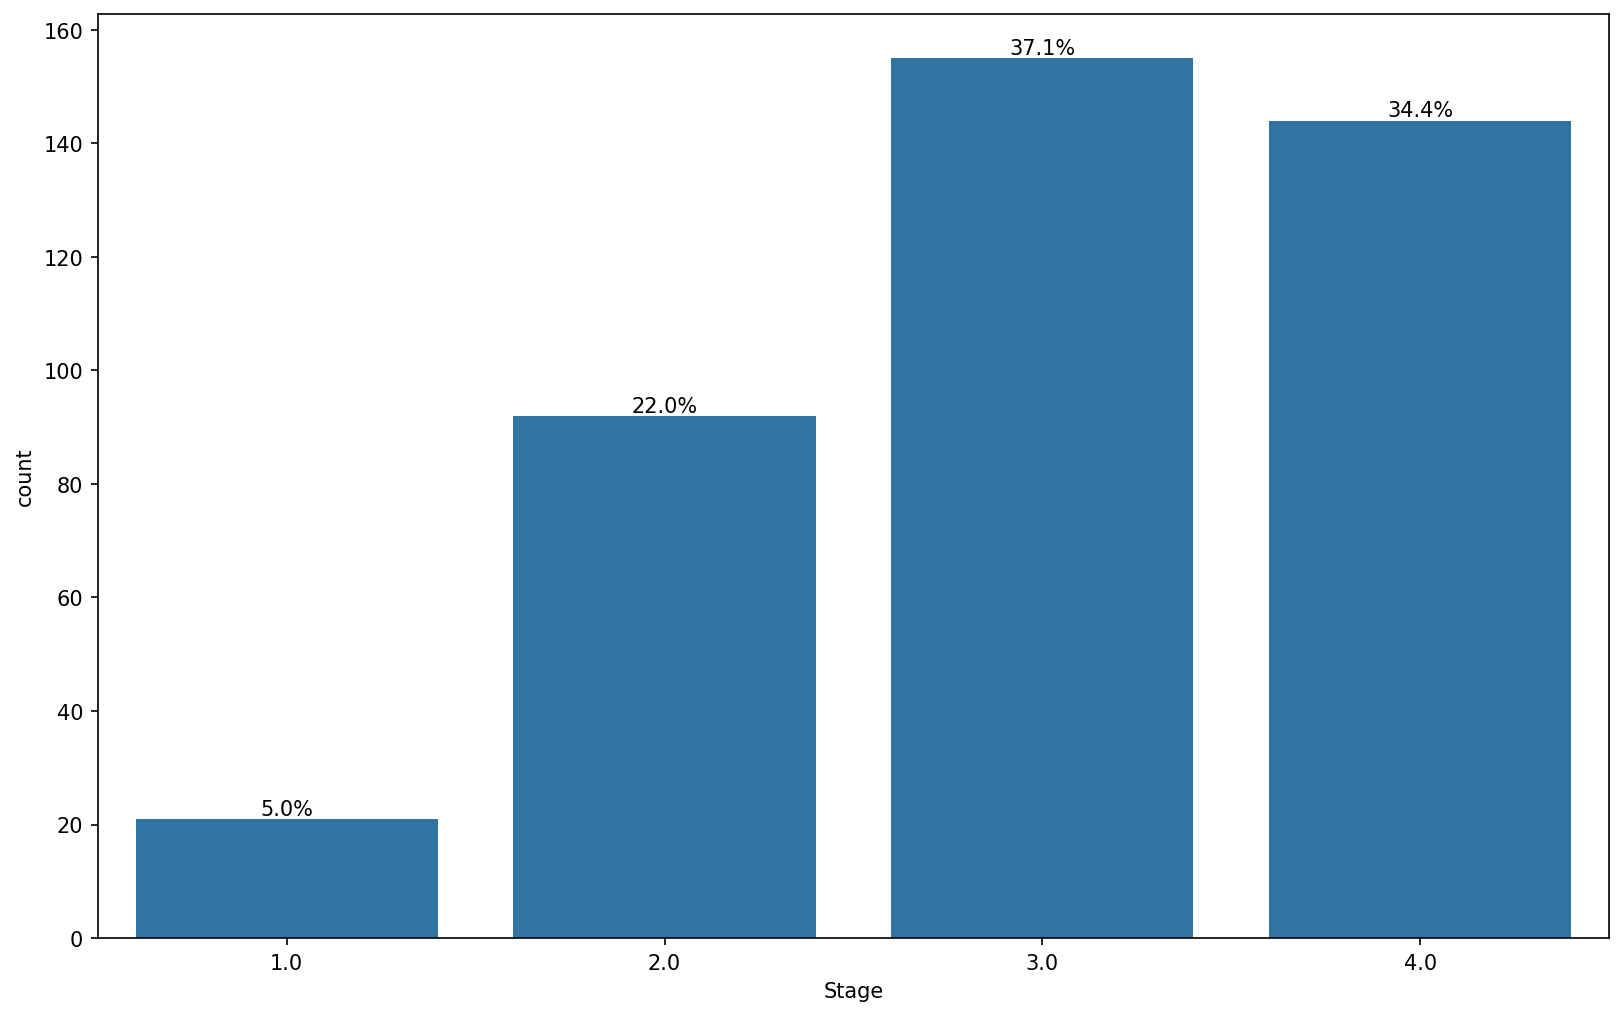

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 8), dpi=150)
ax = sns.countplot(x='Stage', data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.1f}%'.format(100. * height / total),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class.

Bivariate Analysis

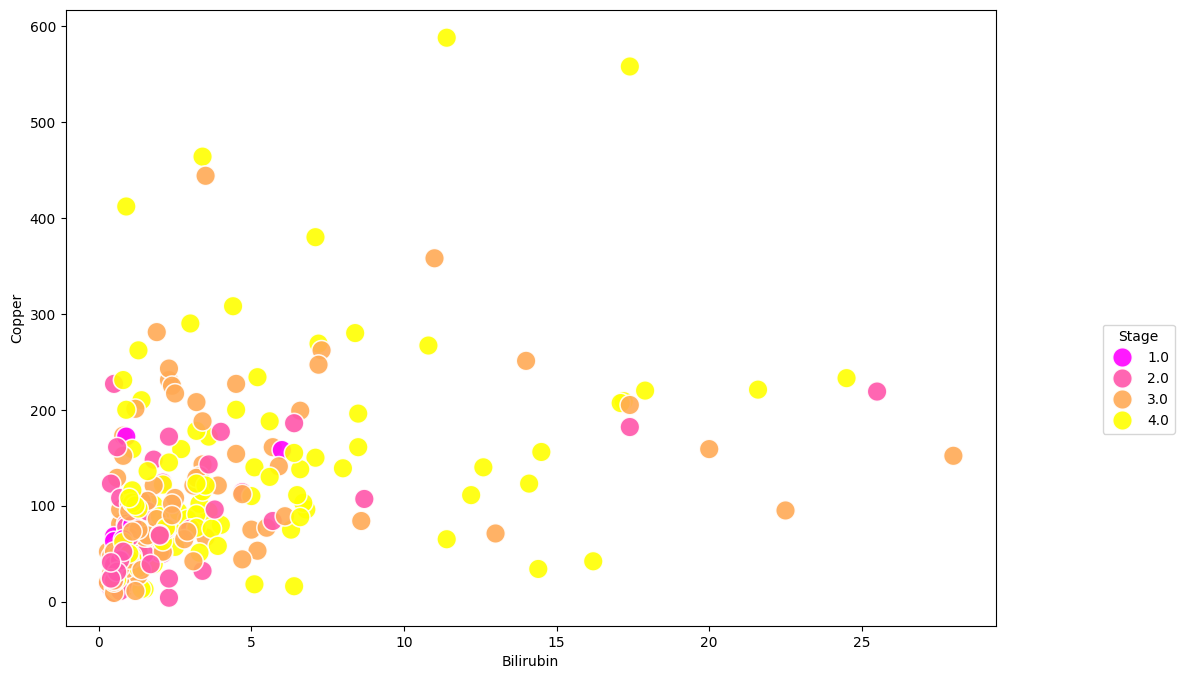

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [ ]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [ ]:
males.describe()

N_Days           Age  Bilirubin  Cholesterol    Albumin  \
count    44.000000     44.000000  44.000000    35.000000  44.000000   
mean   1894.022727  20348.340909   2.865909   362.457143   3.535000   
std    1213.034356   4009.641699   2.319477   178.993319   0.456598   
min     140.000000  12227.000000   0.600000   151.000000   2.270000   
25%    1060.750000  17886.000000   1.300000   245.000000   3.327500   
50%    1507.000000  19724.000000   2.050000   317.000000   3.645000   
75%    2715.750000  23588.750000   3.500000   426.500000   3.870000   
max    4459.000000  28650.000000   9.500000  1000.000000   4.300000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   36.000000     36.000000   36.000000      35.000000   43.000000   
mean   154.277778   2172.950000  121.990556     133.428571  231.139535   
std    100.665389   2418.446239   47.013095      52.168441   85.225634   
min     13.000000    516.000000   46.500000      49.000000   70.000000   
25%     80.750000    852.000000   82.770000      91.000000  165.500000   
50%    134.500000   1116.000000  121.675000     126.000000  217.000000   
75%    211.750000   2313.000000  153.450000     163.000000  298.500000   
max    444.000000  10396.800000  221.880000     242.000000  394.000000   

       Prothrombin      Stage  
count    44.000000  44.000000  
mean     10.940909   3.068182  
std       0.931445   0.925045  
min       9.700000   1.000000  
25%      10.275000   2.750000  
50%      10.900000   3.000000  
75%      11.225000   4.000000  
max      14.100000   4.000000

In [ ]:
females.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [ ]:
round(males.Status.value_counts() / len(males) * 100,2)

Status
D     54.55
C     38.64
CL     6.82
Name: count, dtype: float64

In [ ]:
round(females.Status.value_counts() / len(females) * 100,2)

Status
C     57.49
D     36.63
CL     5.88
Name: count, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [ ]:
round(males.Stage.value_counts() / len(males) * 100,2)

Stage
4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: count, dtype: float64

In [ ]:
round(females.Stage.value_counts() / len(females) * 100,2)

Stage
3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: count, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [ ]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Hepatomegaly
Y    47.73
N    34.09
Name: count, dtype: float64

In [ ]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Hepatomegaly
Y    37.17
N    36.63
Name: count, dtype: float64

Multivariate Analysis

<Axes: >

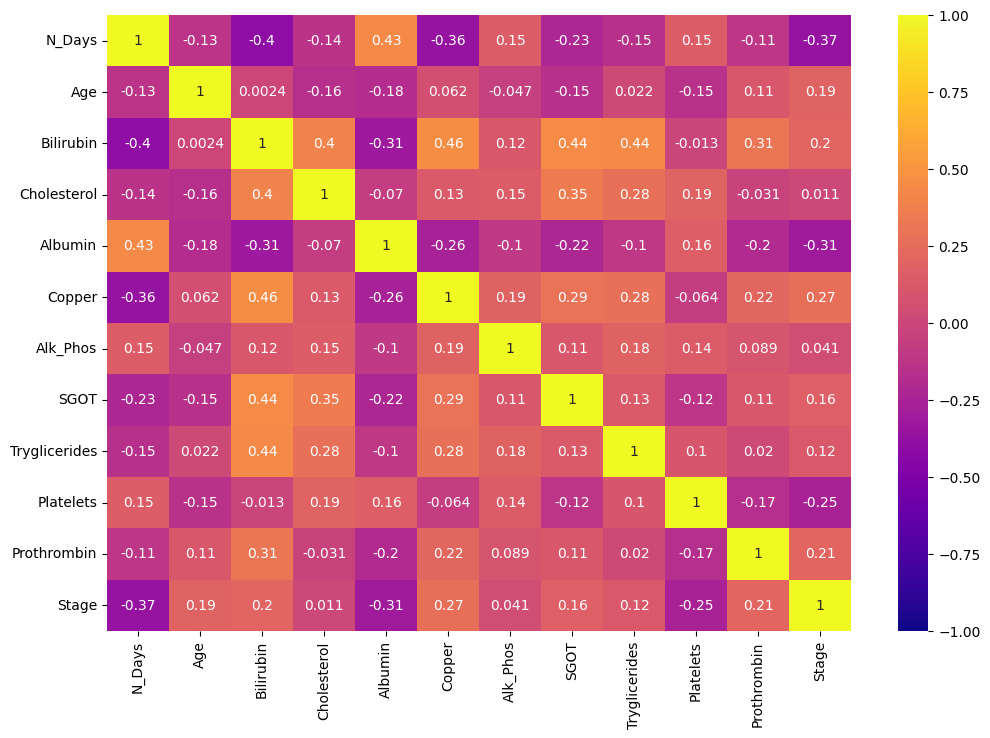

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)


There are no major correlations between any pair of features in the dataset.

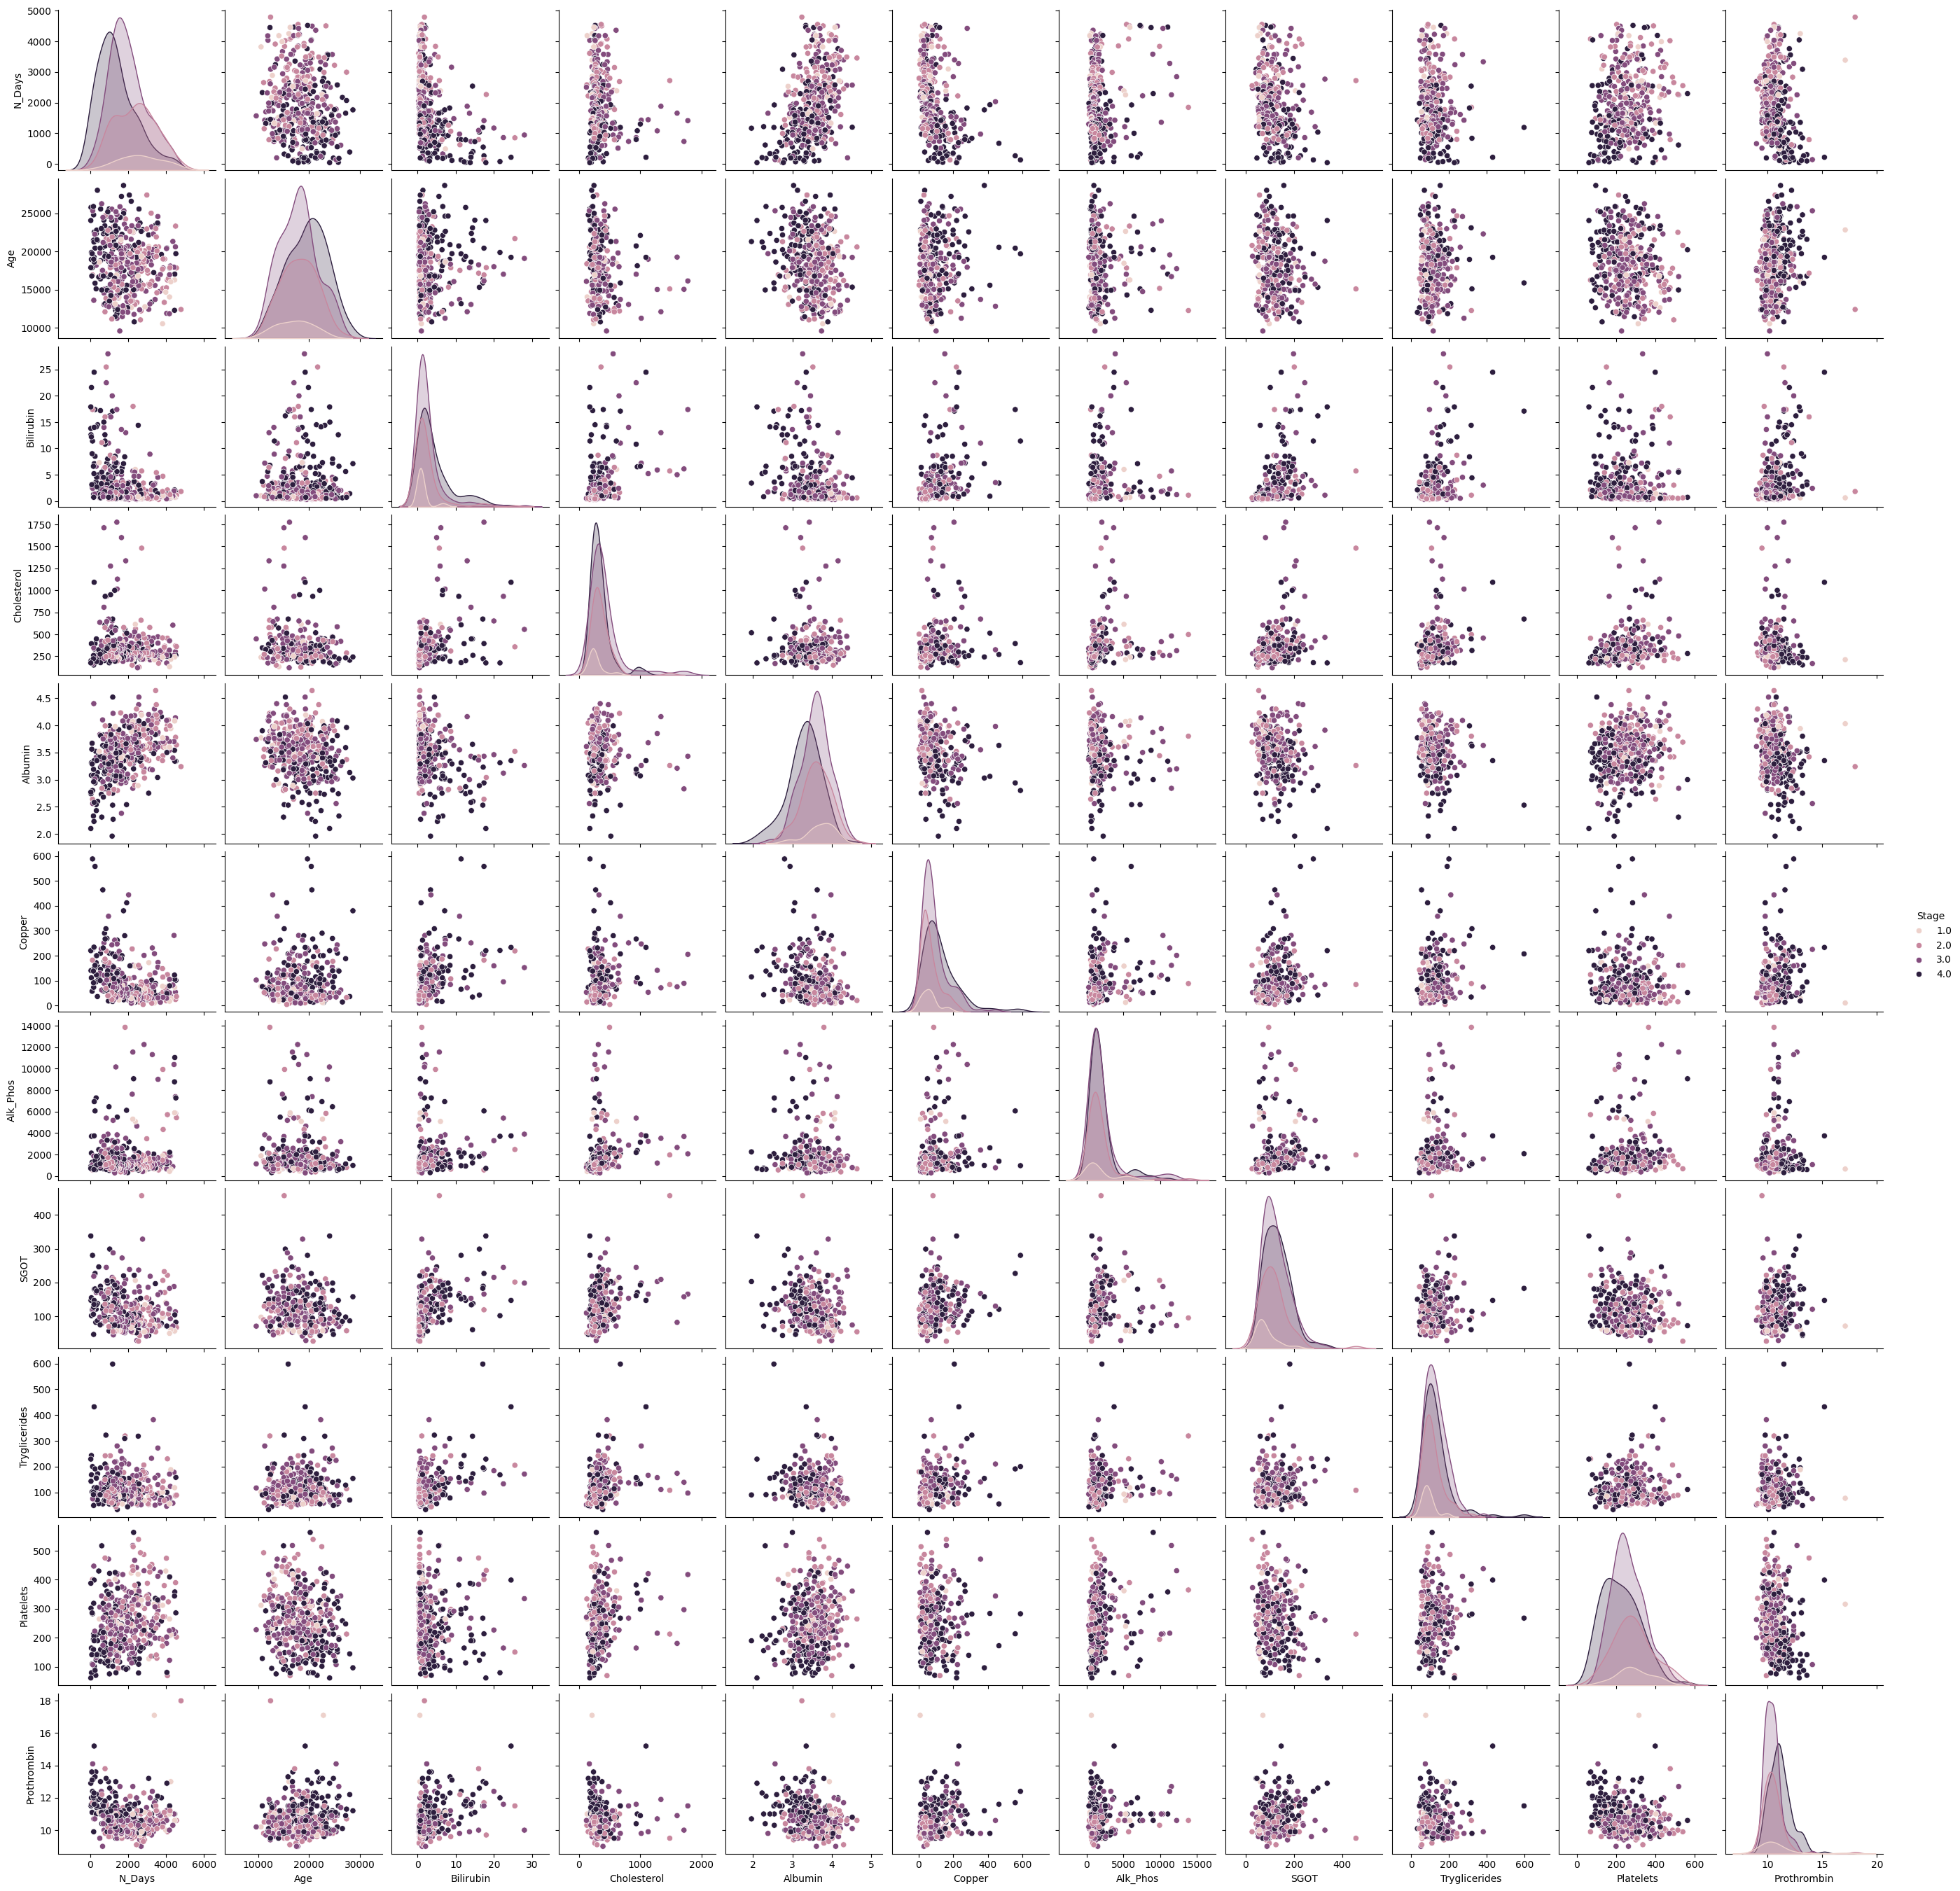

In [ ]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

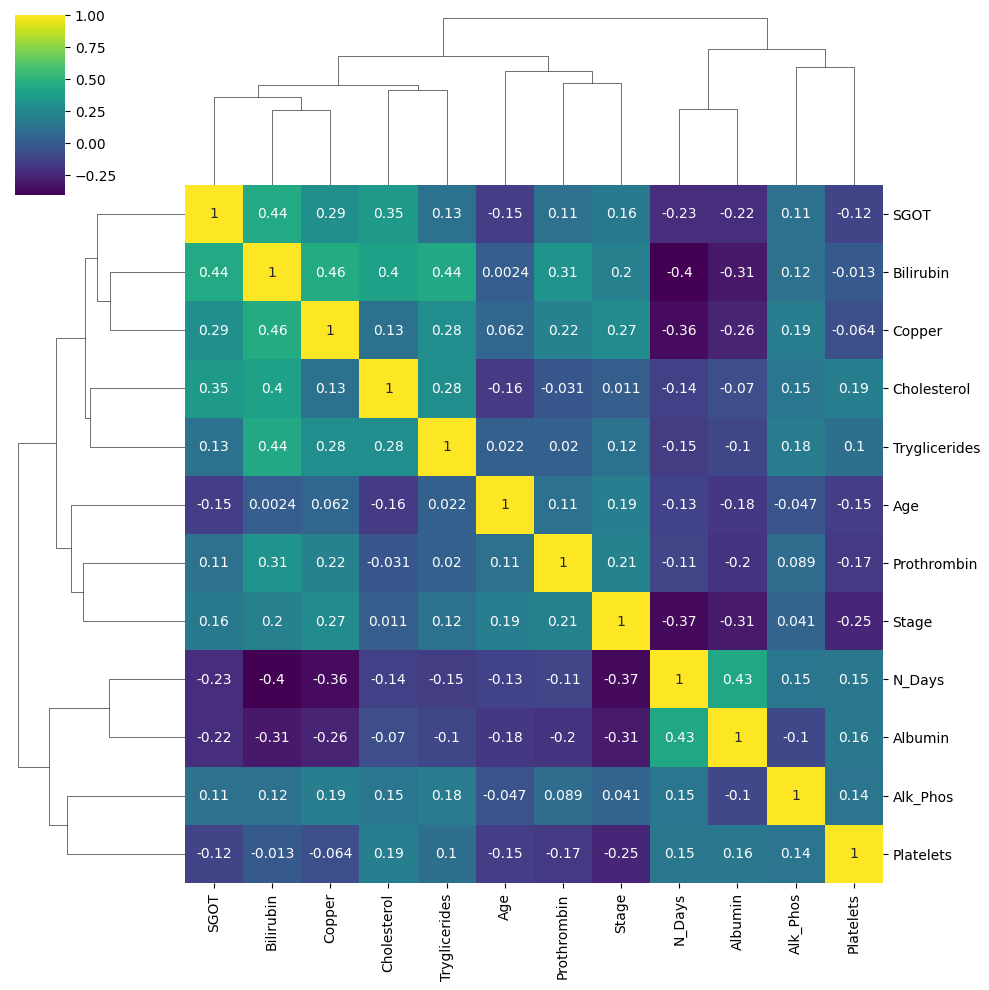

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns and drop rows/columns with all NaNs
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Drop rows and columns that are completely NaN (if any)
corr_matrix = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot only if matrix is not empty
if not corr_matrix.empty:
    sns.clustermap(corr_matrix, cmap='viridis', annot=True)
    plt.show()
else:
    print("Correlation matrix is empty or invalid.")


Feature Engineering

In [ ]:
df.Age = (df.Age.values/365.0).round()
df.head()

N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

Imputation of missing values

In [ ]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

Treatment of outliers

In [ ]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

Encoding of categorical features

In [ ]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

Separating the independent predictor features and the target label

We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [ ]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [ ]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

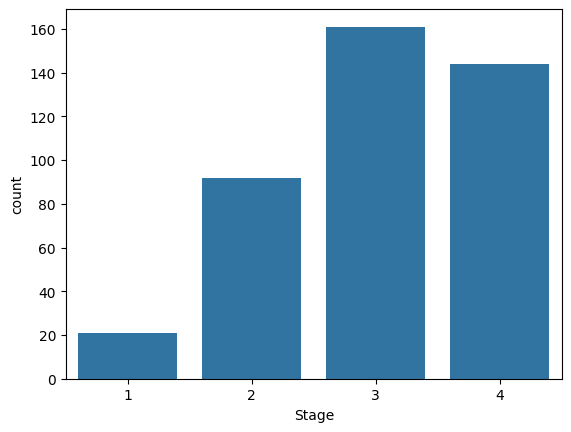

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Say we have this:
y = df['Stage']  # A pandas Series

# Then use:
sns.countplot(x=y)  # Correct!
plt.show()


Feature Scaling

In [ ]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.746868  0.945859 -0.375187  4.693779      0.955925  2.221271  3.090512   
1 -0.746868  0.635429 -0.375187 -0.224631      0.955925  2.221271  0.168668   
2 -0.746868  2.084102  2.991351 -0.224631     -1.115565 -0.473712 -2.753176   
3 -0.746868  0.531953 -0.375187 -0.224631      0.955925  2.221271 -2.753176   
4  1.475755 -1.227150 -0.375187 -0.224631      0.955925  2.221271  0.168668   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.402729    -0.659575 -2.485787  1.899677  0.585216  0.675640   
1  -0.511987    -0.095721  1.558019 -0.538201  2.186063  0.045910   
2  -0.370952    -1.828543 -0.175041  2.353791 -1.288415 -0.403123   
3  -0.182906    -0.893369 -2.643338 -0.299193  2.186063 -1.317430   
4   0.569279    -0.412029 -0.043748  1.588967 -1.046807  0.036373   

   Tryglicerides  Platelets  Prothrombin  
0       2.008918  -0.814446     1.966242  
1      -0.692304  -0.460390    -0.042452  
2      -1.753498  -1.259871     1.715155  
3      -0.563675  -0.894394    -0.419082  
4      -1.206823  -1.431188     0.334178

Model Training & Evaluation

Dividing the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assume your data is clean and prepared
df = pd.read_csv('cirrhosis.csv')
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Stage', axis=1)
y = df['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

print(scores)


[0.3493975903614458, 0.2289156626506024, 0.3855421686746988, 0.37349397590361444, 0.3855421686746988, 0.40963855421686746, 0.3493975903614458, 0.3614457831325301, 0.42168674698795183, 0.42168674698795183, 0.42168674698795183, 0.40963855421686746, 0.43373493975903615, 0.46987951807228917, 0.4578313253012048, 0.4578313253012048, 0.4819277108433735, 0.5301204819277109, 0.5060240963855421, 0.5060240963855421]


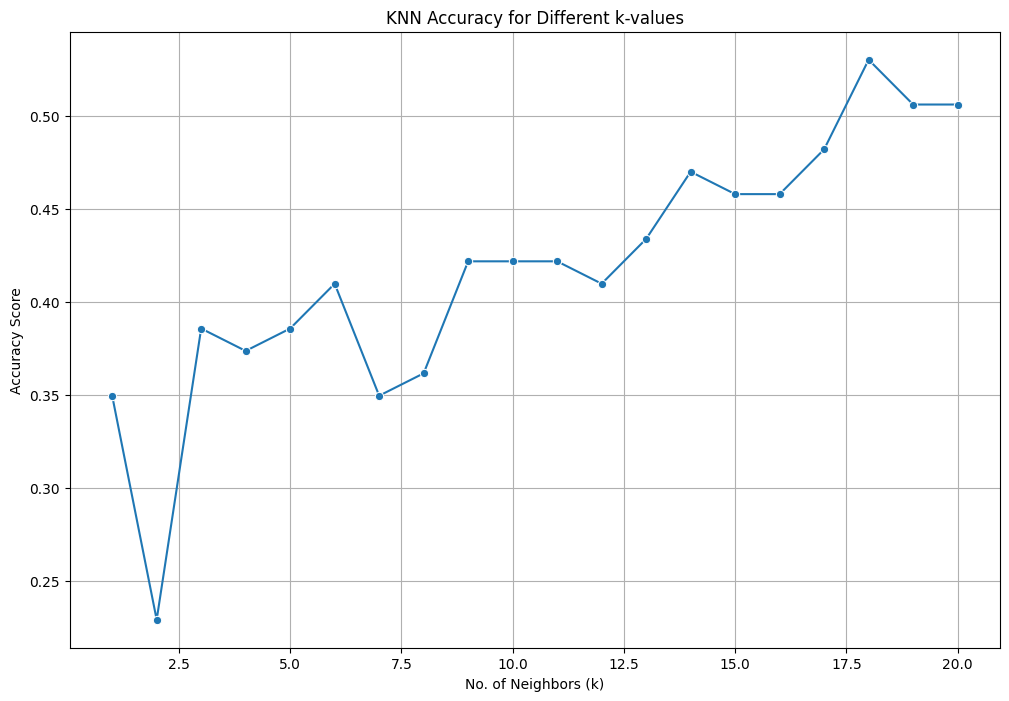

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
sns.lineplot(x=np.arange(1, 21), y=scores, marker='o')
plt.xlabel('No. of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different k-values')
plt.grid(True)
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 0  1  4  0]
 [ 0  6 10  2]
 [ 0  6 20  7]
 [ 0  0  8 19]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.46      0.33      0.39        18
         3.0       0.48      0.61      0.53        33
         4.0       0.68      0.70      0.69        27

    accuracy                           0.54        83
   macro avg       0.40      0.41      0.40        83
weighted avg       0.51      0.54      0.52        83



<Axes: xlabel='Importance', ylabel='Feature'>

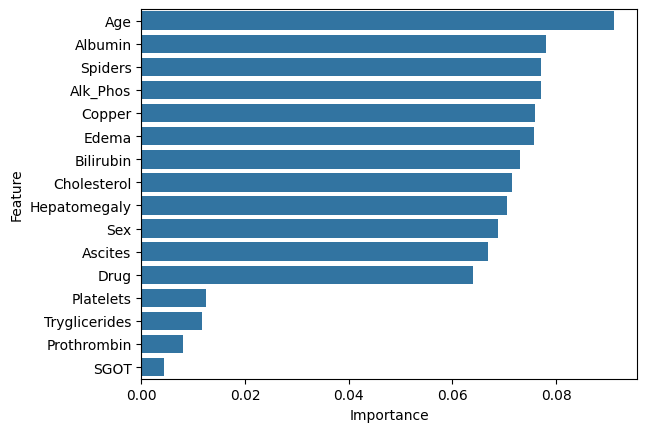

In [ ]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')